In [1]:
%matplotlib inline

# Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. 
In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

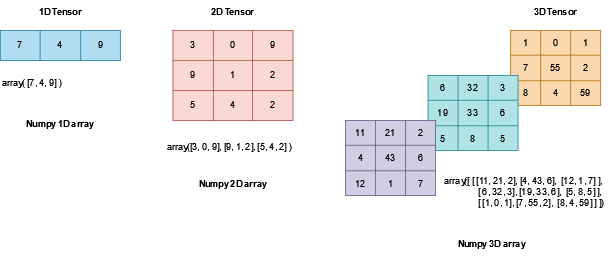

Tensors are similar to [NumPy’s](https://numpy.org/) ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory address, eliminating the need to copy data (see `bridge-to-np-label`). Tensors are also optimized for automatic differentiation (we'll see more about that later in the Autograd unit). If you’re familiar with `ndarrays`, you’ll be right at home with the Tensor API. If not, follow along!

Let's start by setting up our environment.

In [2]:
import torch
import numpy as np

# Initializing a Tensor

Tensors can be initialized in various ways. Take a look at the following examples:

## Directly from data

Tensors can be created directly from data. The data type is automatically inferred.



In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

## From a NumPy array

Tensors can be created from NumPy arrays (and vice versa - see `bridge-to-np-label`).  Since, numpy _'np_array'_ and tensor _'x_np'_ share the same memory location here, changing the value for one will change the other.  

In [23]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]], dtype=torch.int32) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]], dtype=torch.int32) 



## From another tensor:

The new tensor retains the properties (shape, data type) of the argument tensor, unless explicitly overridden.



In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2476, 0.2297],
        [0.6623, 0.8990]]) 



## With random or constant values:

``shape`` is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.  Shape shows the number of rows and columns in the tensor.  E.g. shape = (# of rows, # of columns).



In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4424, 0.4927, 0.5646],
        [0.7742, 0.0868, 0.3927]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


# Attributes of a Tensor

Tensor attributes describe their shape, data type, and the device on which they are stored.



In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


# Operations on Tensors

There are over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, 
indexing, slicing).  For sampling and reviewing a
comprehensive description [here](https://pytorch.org/docs/stable/torch.html).

Each of these operations can be run on the GPU (at typically higher speeds than on a
CPU).
- CPUs have up to 16 cores. Cores are units that do the actual computation.  Each core processes tasks in a sequential order (one task at a time).
- GPU have 1000s of cores.  GPU cores handle computations in parallel processing.  Tasks are divided and processed across the different cores.  That's was makes GPUs faster than CPUs in most cases.  GPUs preform better with large data than small data.  GPU are typically use for high intensive computation of graphics or neural networks (we'll see more about that later in the Neural Network unit).
- PyTorch has a built-in CUDA library API for developers to be able to access and utilize the GPU.

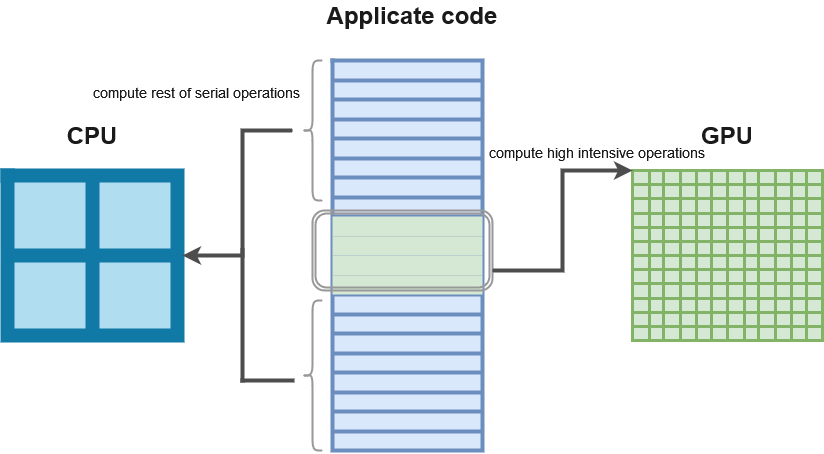

By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using 
`.to` method (after checking for GPU availability). Keep in mind that copying large tensors
across devices can be expensive in terms of time and memory!


In [24]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.

## Standard numpy-like indexing and slicing:

In [9]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


## Joining tensors
You can use `torch.cat` to concatenate a sequence of tensors along a given dimension.
See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining op that is subtly different from ``torch.cat``.



In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


## Arithmetic operations



In [11]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

## Single-element tensors
If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using `item()`:



In [12]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


## In-place operations
Operations that store the result into the operand are called in-place. They are denoted by a ``_`` suffix. 
For example: ``x.copy_(y)``, ``x.t_()``, will change ``x``.

> **Note:** In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged.



In [13]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


## Bridge with NumPy

Tensors on the CPU and NumPy arrays can share their underlying memory
locations, and changing one will change	the other.

### Tensor to NumPy array

In [14]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [15]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to Tensor

In [16]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [17]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
